# Spam Detection 

Library Import

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

Load Dataset

In [10]:
v1_field = "v1"
v2_field = "v2"

In [16]:
dataset_name = "spam.csv"
spam_df = pd.read_csv(dataset_name, encoding = "ISO-8859-1")
spam_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)
spam_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Visualization

Word Cloud

In [21]:
def visualize_word_cloud(documents, title, width, height):
    word_cloud = WordCloud(width = width, height = height)
    text_from_all_documents = " ".join(documents)
    word_cloud.generate(text_from_all_documents)

    plt.title(title)
    plt.axis("off")
    plt.imshow(word_cloud)

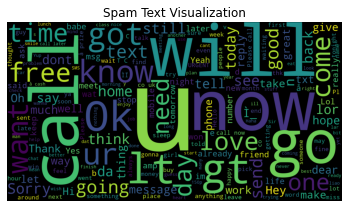

In [22]:
visualize_word_cloud(spam_df[v2_field], "Spam Text Visualization", 1500, 800)

Label Distribution

<AxesSubplot:xlabel='v1', ylabel='Count'>

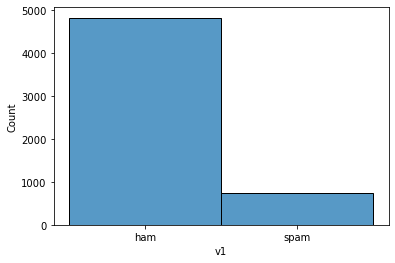

In [24]:
sns.histplot(spam_df[v1_field])

## Data Preprocessing

In [26]:
sms_texts = spam_df[v2_field]
label = spam_df[v1_field]

Remove All Punctuations

In [29]:
def get_removed_duplicated_space_in_string(my_string):
    return " ".join(my_string.split())

def get_erased_punctuations(text):
    list_of_punctuations = string.punctuation + '"‘'
    final_text = text
    
    for punc in list_of_punctuations:
        final_text = final_text.replace(punc, " ")
    
    final_text = get_removed_duplicated_space_in_string(final_text)
    
    return final_text

sms_texts_no_punc = [get_erased_punctuations(sms_text) for sms_text in sms_texts]
sms_texts_no_punc[:3]

['Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry question std txt rate T C s apply 08452810075over18 s']

Lowercase All Letters

In [30]:
def lowercase_letters(sentence):
    return sentence.lower()

sms_texts_lowercase = edgar_alian_poe_poem_lower_case = list(map(lowercase_letters, sms_texts_no_punc))
sms_texts_lowercase

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say',
 'nah i don t think he goes to usf he lives around here though',
 'freemsg hey there darling it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send å£1 50 to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only',
 'had your mobile 11 months or more u r entitled